In [2]:
import pandas as pd

dataset = pd.read_csv('NationalNames.csv')
#dataset.describe()
#dataset.info()
#dataset.head(10)


In [3]:
dataset.dropna(inplace = True)
dataset.drop_duplicates(inplace = True)
dataset.head(10)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414
8,9,Bertha,1880,F,1320
9,10,Sarah,1880,F,1288


In [5]:
popular = dataset.groupby(['Name', 'Year', 'Gender'])['Count'].sum().reset_index()
popular.head(10)

,Name,Year,Gender,Count
0,Aaban,2007,M,5
1,Aaban,2009,M,6
2,Aaban,2010,M,9
3,Aaban,2011,M,11
4,Aaban,2012,M,11
5,Aaban,2013,M,14
6,Aaban,2014,M,16
7,Aabha,2011,F,7
8,Aabha,2012,F,5
9,Aabha,2014,F,9


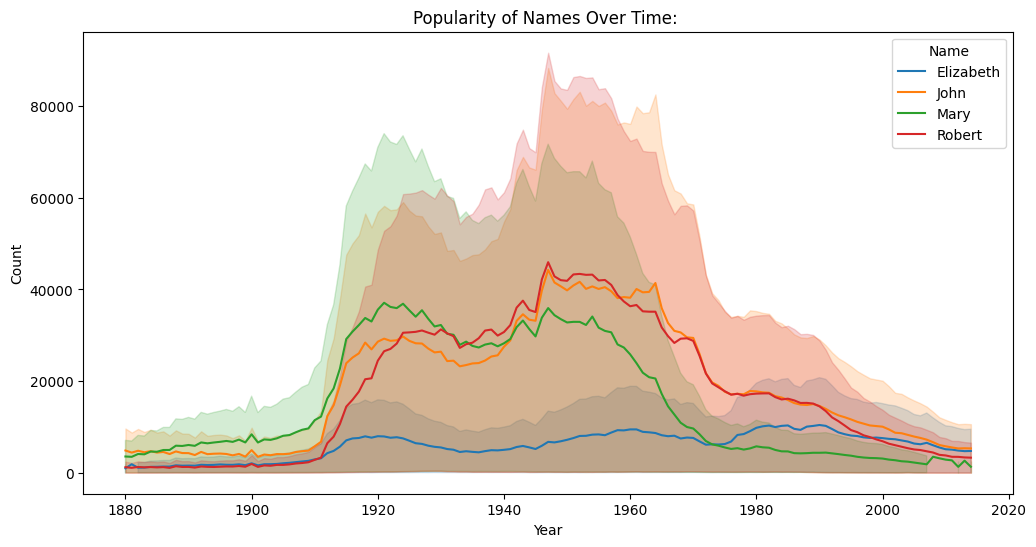

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Count', hue='Name', data=popular[popular['Name'].isin(['John', 'Mary', 'Robert', 'Elizabeth'])])
plt.title('Popularity of Names Over Time: ')
plt.show()

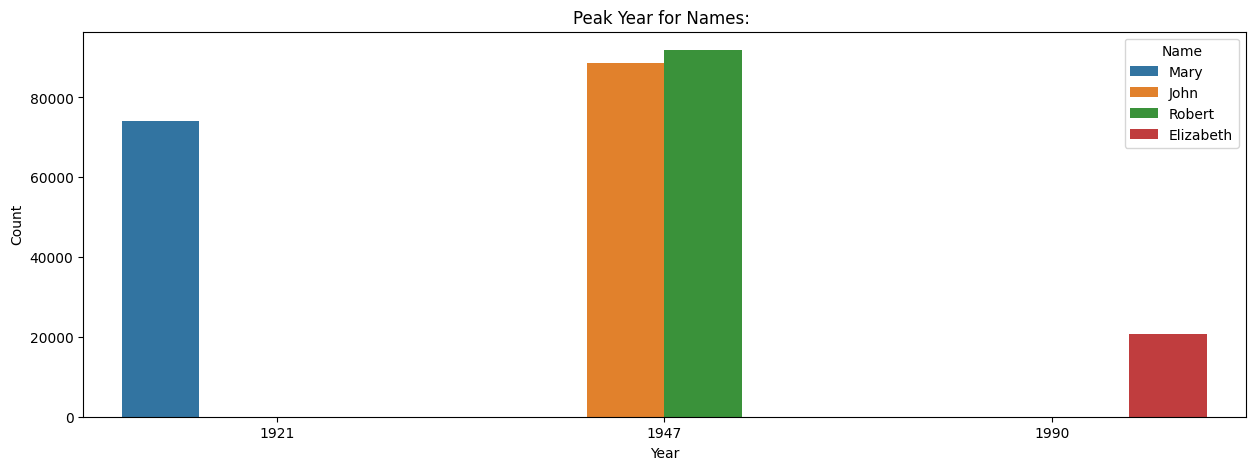

In [14]:
#total count of a name each year
namecount = dataset.groupby(['Name', 'Year'])['Count'].sum().reset_index()
peakyear = namecount.loc[namecount.groupby('Name')['Count'].idxmax()]

plt.figure(figsize=(15, 5))
sns.barplot(x='Year', y='Count', hue='Name', data=peakyear[peakyear['Name'].isin(['John', 'Mary', 'Robert', 'Elizabeth'])])
plt.title('Peak Year for Names: ')
plt.show()


In [21]:
most_popular_name = namecount.loc[namecount['Count'].idxmax()]
print("The most popular name of all time is:", most_popular_name['Name'])
print("Total count:", most_popular_name['Count'])
print("Year:", most_popular_name['Year'])

The most popular name of all time is: Linda
Total count: 99895
Year: 1947


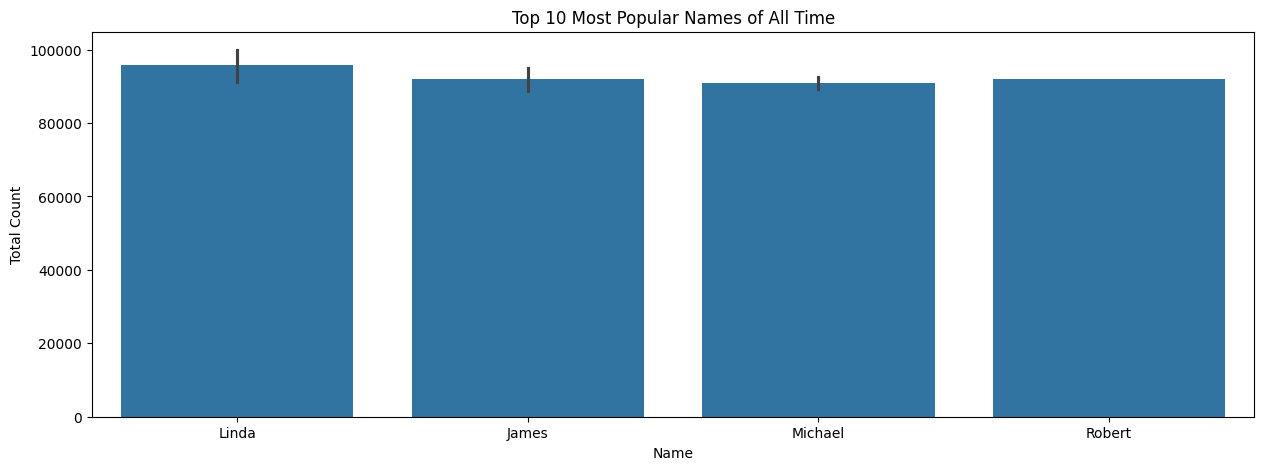

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for the most popular name
plt.figure(figsize=(15, 5))
sns.barplot(x='Name', y='Count', data=namecount.sort_values(by='Count', ascending=False).head(10))
plt.title('Top 10 Most Popular Names of All Time')
plt.xlabel('Name')
plt.ylabel('Total Count')
plt.show()